# SHAP For Classification 1 Logistic Regression

In [2]:
import shap
from sklearn.model_selection import train_test_split

In [3]:
X, y = shap.datasets.adult()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

In [6]:
cats = ['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
nums = ['Age', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week']

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cats),
        ('num', StandardScaler(), nums)
    ])

In [8]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000))
])

In [9]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Workclass',
                                                   'Marital Status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'Education-Num',
                                                   'Capital Gain',
                                                   'Capital Loss',
                                                   'Hours per week'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [10]:
X_sub = shap.sample(X_train, 100)

In [11]:
ex = shap.Explainer(model.predict_proba, X_sub)
shap_values = ex(X_test.iloc[0:100])

PermutationExplainer explainer: 101it [00:28,  2.88it/s]                                                               


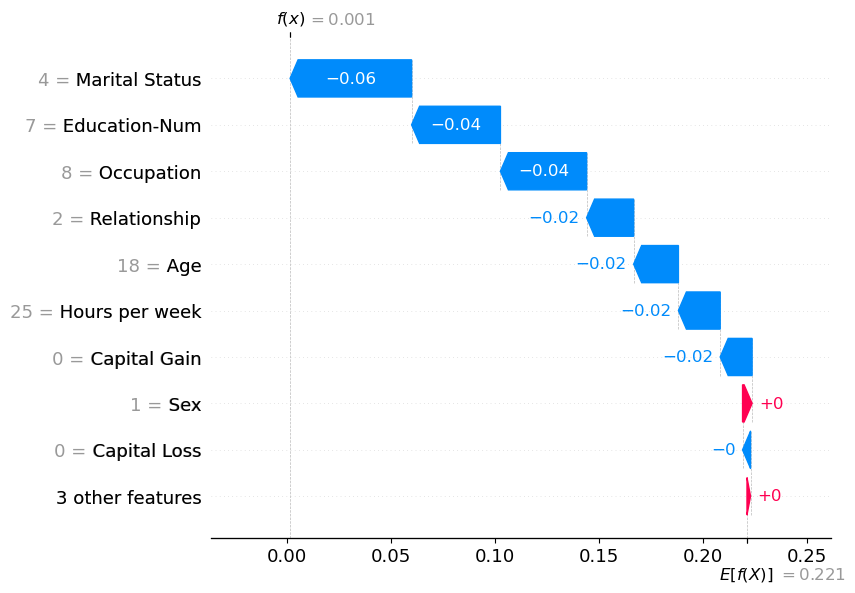

In [12]:
class_index = 1
data_index = 1
shap.plots.waterfall(shap_values[data_index,:,class_index])

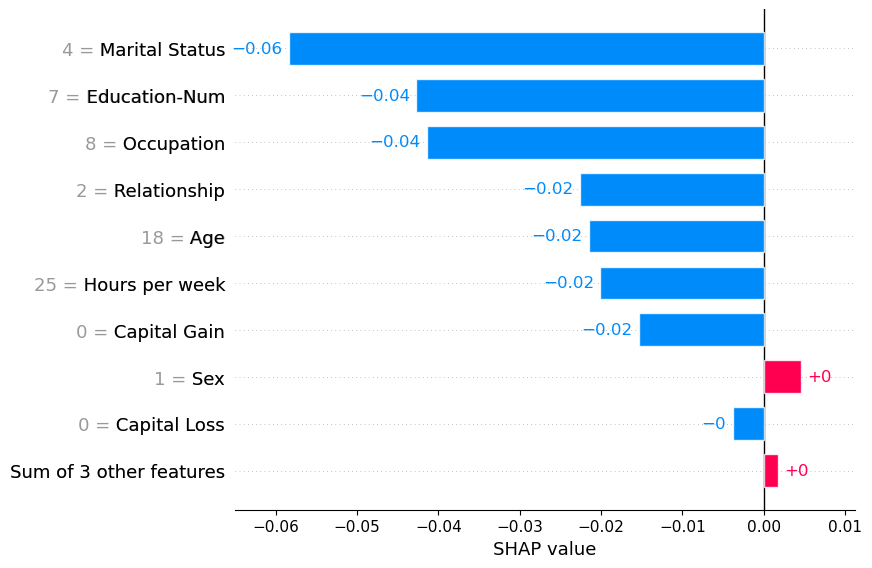

In [13]:
class_index = 1
shap.plots.bar(shap_values[data_index,:,class_index])

In [14]:
shap.initjs()
shap.plots.force(shap_values[data_index,:,class_index])